In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Instructions
1. We will be conducting the entire assignment through this notebook. You will be entering your code in the cells provided, and any explanation and details asked in markdown cells. 
2. You are free to add more code and markdown cells for describing your answer, but make sure they are below the question asked and not somewhere else. 
3. The notebook needs to be submitted on LMS. You can find the submission link [here](https://lms.iiitb.ac.in/moodle/mod/assign/view.php?id=13932). 
4. The deadline for submission is **5th October, 2020 11:59PM**.

# Data import
The data required for this assignment can be downloaded from the following [link](https://www.kaggle.com/dataset/e7cff1a2c6e29e18684fe6b077d3e4c42f9a7ae6199e01463378c60fe4b4c0cc), it's hosted on kaggle. Do check directory paths on your local system.  

In [19]:
alcdata = pd.read_csv("/home/komaldadhich/Documents/study/MS_Subjects/Machine_Learning/ML_TA_IIITB_2020/Assignment_1/archive/Assignment/alcoholism/student-mat.csv")
fifadata = pd.read_csv("/home/komaldadhich/Documents/study/MS_Subjects/Machine_Learning/ML_TA_IIITB_2020/Assignment_1/archive/Assignment/fifa18/data.csv")
accidata1 = pd.read_csv("/home/komaldadhich/Documents/study/MS_Subjects/Machine_Learning/ML_TA_IIITB_2020/Assignment_1/archive/Assignment/accidents/accidents_2005_to_2007.csv")
accidata2 = pd.read_csv("/home/komaldadhich/Documents/study/MS_Subjects/Machine_Learning/ML_TA_IIITB_2020/Assignment_1/archive/Assignment/accidents/accidents_2009_to_2011.csv")
accidata3 = pd.read_csv("/home/komaldadhich/Documents/study/MS_Subjects/Machine_Learning/ML_TA_IIITB_2020/Assignment_1/archive/Assignment/accidents/accidents_2012_to_2014.csv")

/home/komaldadhich/Documents/study/MS_Subjects/Machine_Learning/venvML/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
alcdata.isnull().any()

school               False
sex                  False
age                  False
address              False
famsize              False
Pstatus              False
Medu                 False
Fedu                 False
Mjob                 False
Fjob                 False
reason               False
guardian             False
traveltime           False
studytime            False
failures             False
schoolsup            False
famsup               False
paid                 False
activities           False
nursery              False
higher               False
internet             False
romantic             False
famrel               False
freetime             False
goout                False
Dalc                 False
Walc                 False
health               False
absences             False
G1                   False
G2                   False
G3                   False
AvgGrade             False
school_GP            False
gender               False
urban                False
f

# Part - 1
## Alcohol Consumption Data
The following data was obtained in a survey of students' math course in secondary school. It contains a lot of interesting social, gender and study information about students. 


### 1. Try to visualize correlations between various features and grades and see which features have a significant impact on grades. 
Try to engineer the three grade parameters (G1, G2 and G3) as one feature for such comparisons.



In [20]:
alcdata['AvgGrade'] = alcdata[['G1', 'G2', 'G3']].mean(axis=1)
alcdata.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,AvgGrade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.666667


In [23]:
alcdata.corr()['AvgGrade'].sort_values()

failures     -0.375759
goout        -0.154511
age          -0.134589
traveltime   -0.128197
Walc         -0.088025
health       -0.080380
Dalc         -0.072508
absences     -0.005909
freetime      0.003773
famrel        0.021653
studytime     0.134565
Fedu          0.175852
Medu          0.224260
G1            0.919386
G3            0.959873
G2            0.967999
AvgGrade      1.000000
Name: AvgGrade, dtype: float64

<AxesSubplot:>

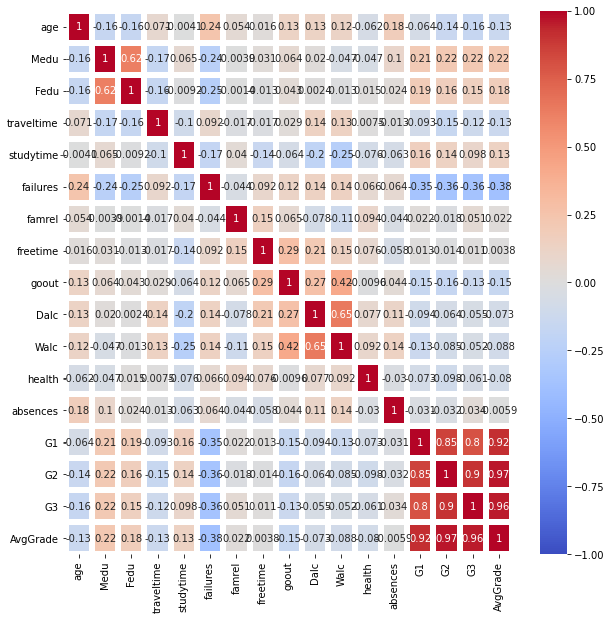

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(alcdata.corr(), vmin=-1, cmap="coolwarm", annot=True, linewidths=5)

Text(0.5, 1.0, 'Density Plot of Final Grades for different genders')

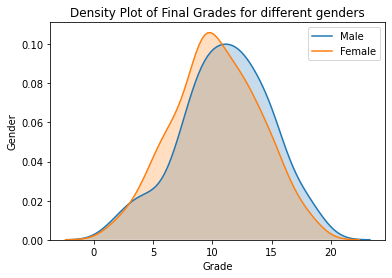

In [65]:
# Make one plot for gardian
sns.kdeplot(alcdata.loc[alcdata['sex'] == 'M', 'AvgGrade'], 
            label = 'Male', shade = True)
sns.kdeplot(alcdata.loc[alcdata['sex'] == 'F', 'AvgGrade'], 
            label = 'Female', shade = True)

plt.xlabel('Grade')
plt.ylabel('Gender')
plt.title('Density Plot of Final Grades for different genders')

<AxesSubplot:xlabel='sex', ylabel='AvgGrade'>

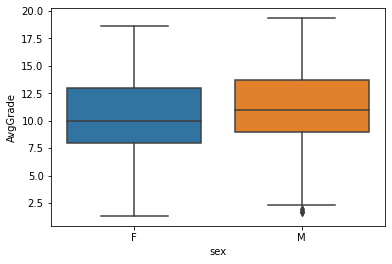

In [59]:
sns.boxplot(x='sex', y='AvgGrade', data=alcdata)

### 2. If there is a need for encoding some of the features,  how would you go  about it? 
Would you consider combining certain encodings together ?


In [25]:
alcdata['school_GP'] = alcdata['school'].apply(lambda x: 1 if x == 'GP' else 0)
alcdata['gender'] = alcdata['sex'].apply(lambda x: 1 if x == 'M' else 0)
alcdata['urban'] = alcdata['address'].apply(lambda x: 1 if x == 'U' else 0)
alcdata['family_size > 3'] = alcdata['famsize'].apply(lambda x: 1 if x == 'GT3' else 0)
alcdata['parents_together'] = alcdata['Pstatus'].apply(lambda x: 1 if x == 'T' else 0)
alcdata = pd.concat([alcdata, pd.get_dummies(alcdata['Mjob'], prefix='Mjob')], axis=1)
alcdata = pd.concat([alcdata, pd.get_dummies(alcdata['Fjob'], prefix='Fjob')], axis=1)
alcdata = pd.concat([alcdata, pd.get_dummies(alcdata['reason'], prefix='reason')], axis=1)
alcdata = pd.concat([alcdata, pd.get_dummies(alcdata['guardian'], prefix='guardian')], axis=1)
alcdata['schoolsup'] = alcdata['schoolsup'].apply(lambda x: 1 if x == 'yes' else 0)
alcdata['famsup'] = alcdata['famsup'].apply(lambda x: 1 if x == 'yes' else 0)
alcdata['paid'] = alcdata['paid'].apply(lambda x: 1 if x == 'yes' else 0)
alcdata['activities'] = alcdata['activities'].apply(lambda x: 1 if x == 'yes' else 0)
alcdata['nursery'] = alcdata['nursery'].apply(lambda x: 1 if x == 'yes' else 0)
alcdata['higher'] = alcdata['higher'].apply(lambda x: 1 if x == 'yes' else 0)

alcdata['internet'] = alcdata['internet'].apply(lambda x: 1 if x == 'yes' else 0)
alcdata['romantic'] = alcdata['romantic'].apply(lambda x: 1 if x == 'yes' else 0)


In [26]:
len(alcdata.columns)

56

In [33]:
alcdata.corr()['AvgGrade'].sort_values()

failures            -0.375759
goout               -0.154511
schoolsup           -0.137644
age                 -0.134589
traveltime          -0.128197
Mjob_other          -0.125160
Mjob_at_home        -0.104032
romantic            -0.102731
reason_course       -0.099345
Walc                -0.088025
Fjob_other          -0.086473
family_size > 3     -0.082560
health              -0.080380
Dalc                -0.072508
guardian_other      -0.070545
famsup              -0.061553
parents_together    -0.043048
reason_home         -0.012343
absences            -0.005909
Fjob_services       -0.001635
guardian_mother      0.000808
freetime             0.003773
Fjob_at_home         0.008591
famrel               0.021653
reason_other         0.033857
activities           0.040859
school_GP            0.043285
guardian_father      0.045001
Fjob_health          0.047473
nursery              0.065145
Mjob_teacher         0.066383
Mjob_services        0.084902
paid                 0.089511
reason_rep

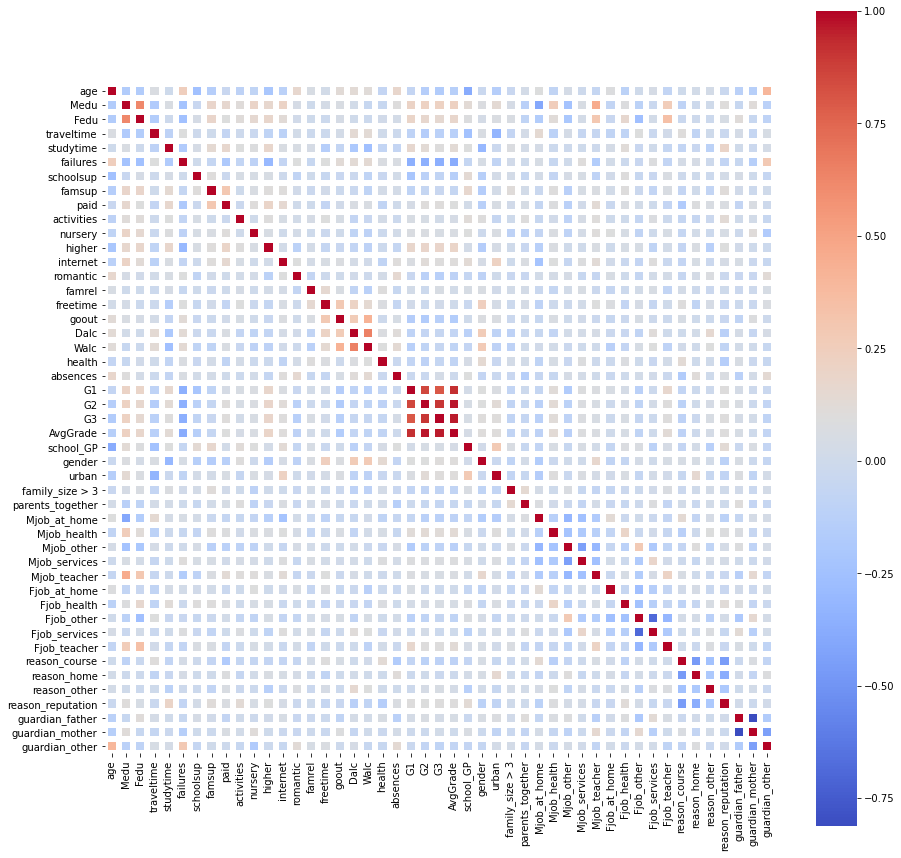

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(alcdata.corr(), square=True, linewidths=5, cmap='coolwarm')
plt.show()

<AxesSubplot:title={'center':'Box plot for final grades,depending on current health'}, xlabel='AvgGrade', ylabel='health'>

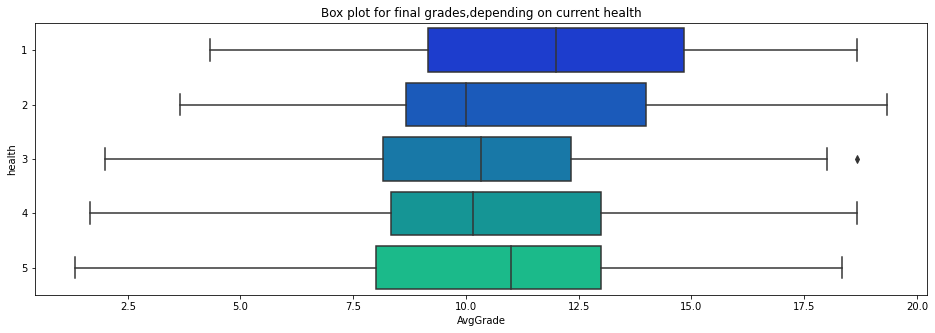

In [58]:
plt.figure(figsize=(16,5))
plt.title("Box plot for final grades,depending on current health")
sns.boxplot(y="health", x="AvgGrade", data = alcdata , orient="h", palette = 'winter')


### 3. Try to find out how family relation(famrel) and parents cohabitation(Pstatus) affect grades of students. 


<AxesSubplot:xlabel='famrel', ylabel='AvgGrade'>

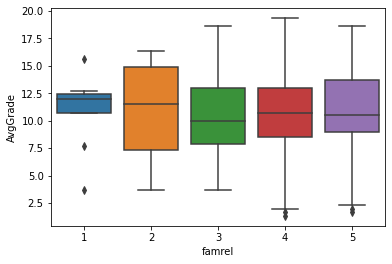

In [45]:
sns.boxplot(x='famrel', y='AvgGrade', data=alcdata)

<AxesSubplot:xlabel='Pstatus', ylabel='AvgGrade'>

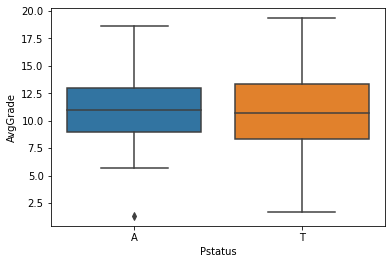

In [46]:
sns.boxplot(x='Pstatus', y='AvgGrade', data=alcdata)


### 4. Figure out which features in the data are skewed, and propose a way to remove skew from all such columns. 

In [42]:
# skewness along the index axis 
alcdata.skew(axis = 0, skipna = True)

age                  0.466270
Medu                -0.318381
Fedu                -0.031672
traveltime           1.607029
studytime            0.632142
failures             2.387026
schoolsup            2.220534
famsup              -0.464291
paid                 0.168315
activities          -0.035584
nursery             -1.466570
higher              -4.114829
internet            -1.791595
romantic             0.705766
famrel              -0.951882
freetime            -0.163351
goout                0.116502
Dalc                 2.190762
Walc                 0.611960
health              -0.494604
absences             3.671579
G1                   0.240613
G2                  -0.431645
G3                  -0.732672
AvgGrade            -0.140547
school_GP           -2.400519
gender               0.106886
urban               -1.337481
family_size > 3     -0.936623
parents_together    -2.607984
Mjob_at_home         1.974869
Mjob_health          2.962844
Mjob_other           0.599385
Mjob_servi

Text(0.5, 1.0, 'Density Plot of Final Grades by Location')

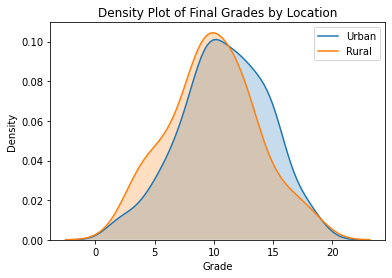

In [4]:
# Make one plot for each different location
sns.kdeplot(alcdata.loc[alcdata['famrel'] == 'U', 'AvgGrade'], 
            label = 'Urban', shade = True)
sns.kdeplot(alcdata.loc[alcdata['address'] == 'R', 'AvgGrade'], 
            label = 'Rural', shade = True)
# Add labeling
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Density Plot of Final Grades by Location')

(array([257.,   0.,   0.,   0.,   0., 107.,   0.,  23.,   0.,   8.]),
 array([0.        , 0.13862944, 0.27725887, 0.41588831, 0.55451774,
        0.69314718, 0.83177662, 0.97040605, 1.10903549, 1.24766493,
        1.38629436]),
 <BarContainer object of 10 artists>)

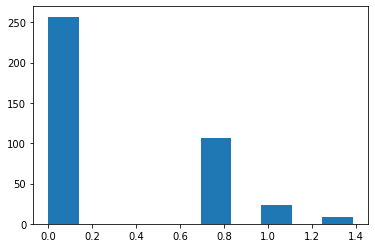

In [77]:
plt.hist(np.log(alcdata['traveltime']))
# plt.hist(alcdata['traveltime'])

# Part - 2
## FIFA 2019  Data


### 1. Which clubs are the most economical? How did you decide that?

In [43]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer.
fifadata.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### 2. What is the relationship between age and individual potential of the player? How does age influence the players' value? At what age does the player exhibit peak pace ?

In [ ]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 

### 3. What skill sets are helpful in deciding a player's potential? How do the traits contribute to the players' potential? 

In [ ]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 

### 4. Which features directly contribute to the wages of the players?

In [ ]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 

### 5. What is the age distribution in different clubs? Which club has most players young?

In [ ]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 

# Part - 3
## UK Road Accidents Data


The UK government amassed traffic data from 2000 and 2016, recording over 1.6 million accidents in the process and making this one of the most comprehensive traffic data sets out there. It's a huge picture of a country undergoing change.

### 1. The very first step should be to merge all the 3 subsets of the data.

In [ ]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 

### 2. What are the number of casualties in each day of the week? Sort them in descending order. 

In [ ]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 

### 3. On each day of the week, what is the maximum and minimum speed limit on the roads the accidents happened?

In [ ]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 

### 4. What is the importance of Light and Weather conditions in predicting accident severity? What does your intuition say and what does the data portray?

In [ ]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 

### 5. To predict the severity of the accidents which columns do you think are unnecessary and should be dropped before implementing a regression model. Support your statement using relevant plots and hypotheses derived from them.

In [ ]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 

### 6. Implement a basic Logistic Regression Model using scikit learn with cross validation = 5, where you predict the severity of the accident (Accident_Severity). Note that here your goal is not to tune appropriate hyperparameters, but to figure out what features will be best to use.

In [ ]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 